## Homework 9 - Group 1
### Iwan Pasveer, Flavia Leotta, Noah Frinking, Dylan Gavron

Python version (3.12.6)


### Required libraries

In [126]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import timeit

### Seed

In [127]:
random.seed(25)

### Plot

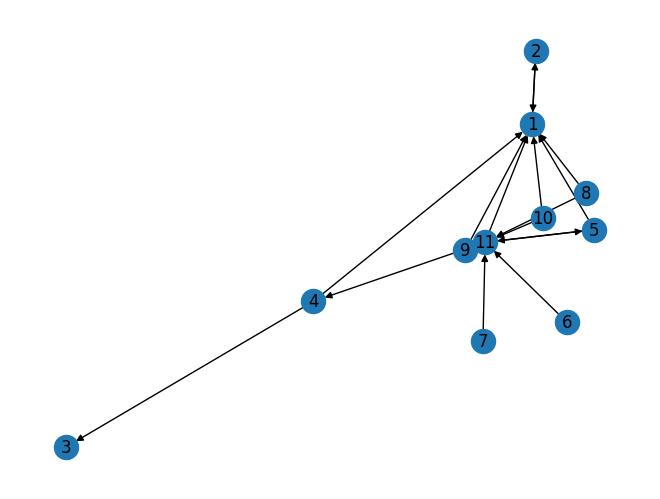

In [128]:
G=nx.DiGraph()
G.add_edges_from([(2, 1), (1,2), (4,1), (4,3), (5,1), (11, 1),(11,4), (11,5), (5,11), (6,11), (7,11), (8,11), (9,11), (10, 11), (10, 1), (9, 1), (8,1)])
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

### Homework 9.1

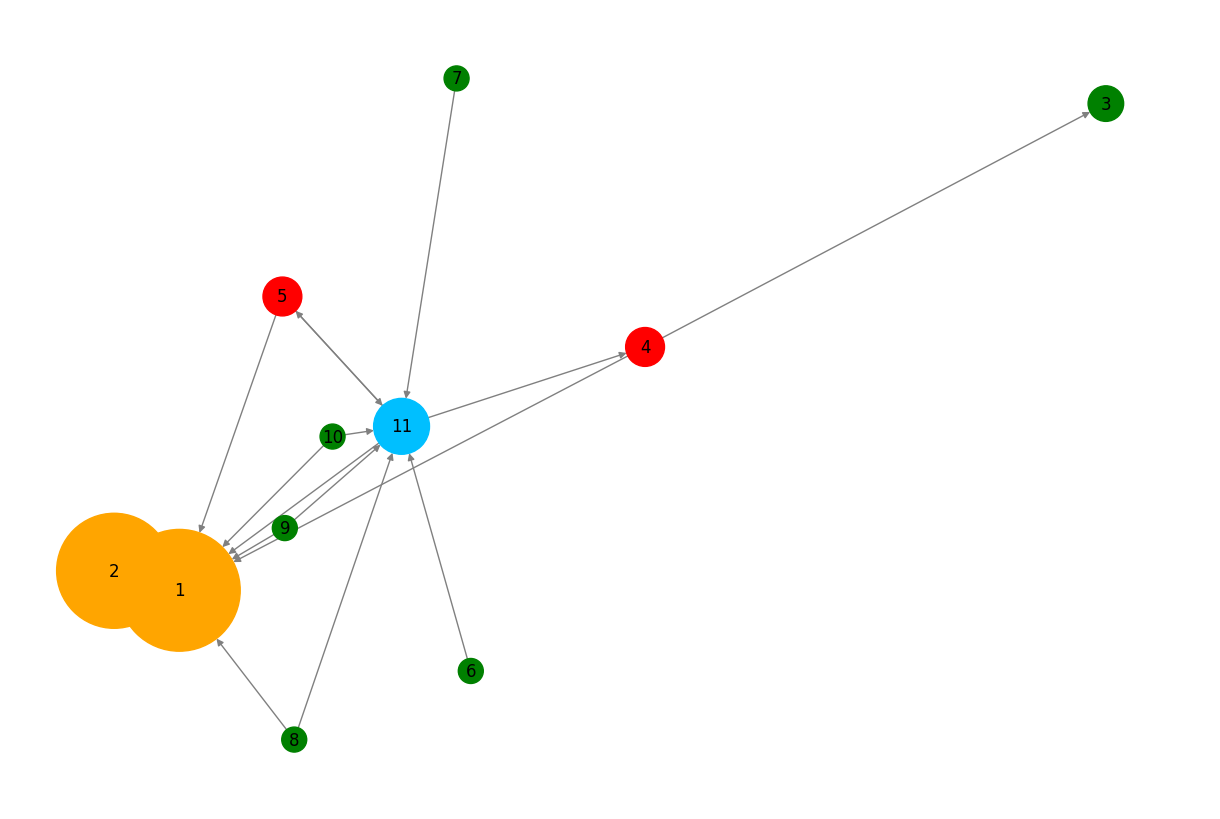

In [129]:
######################################## 9.1.1 ##############################################
def plot_smileygraph(G, alpha = 0.85):
    """
    Plots a networkx graph in the "Smileygraph" configuration.

    Args: 
        G: a networkx graph.
        alpha: value for the damping factor. The default is the standard value of 0.85.
    
    Returs:
        the plot of the graph with the Smileygraph configuration, each node has color and size changed depending on their pagerank values.
    """
    # Calculate PageRank
    pagerank = nx.pagerank(G, alpha=alpha, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

    # Divide them in percentiles
    pagerank_list = list(pagerank.values())
    percentile_90 = np.percentile(pagerank_list, 90)
    percentile_75 = np.percentile(pagerank_list, 75)
    percentile_65 = np.percentile(pagerank_list, 65)

    # Define colours depending on percentiles:
    node_colors = []
    for node, pr_value in pagerank.items():
        if pr_value >= percentile_90:
            node_colors.append('orange')
        elif pr_value >= percentile_75:
            node_colors.append('deepskyblue')
        elif pr_value >= percentile_65:
            node_colors.append('red')
        else:
            node_colors.append('green')


    pos = nx.spring_layout(G, weight='weight')

    # Scale node sizes based on PageRank
    # (For example, multiply by 1000 for better visualization)
    node_sizes = [v * 20000 for v in pagerank.values()]

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos = pos,
        with_labels=True,
        node_size=node_sizes,         # Apply PageRank-based node sizes
        node_color=node_colors,       # Apply PageRank-based node colors
        edge_color='gray',
        font_color='black'
    )

    plt.show()

plot_smileygraph(G)


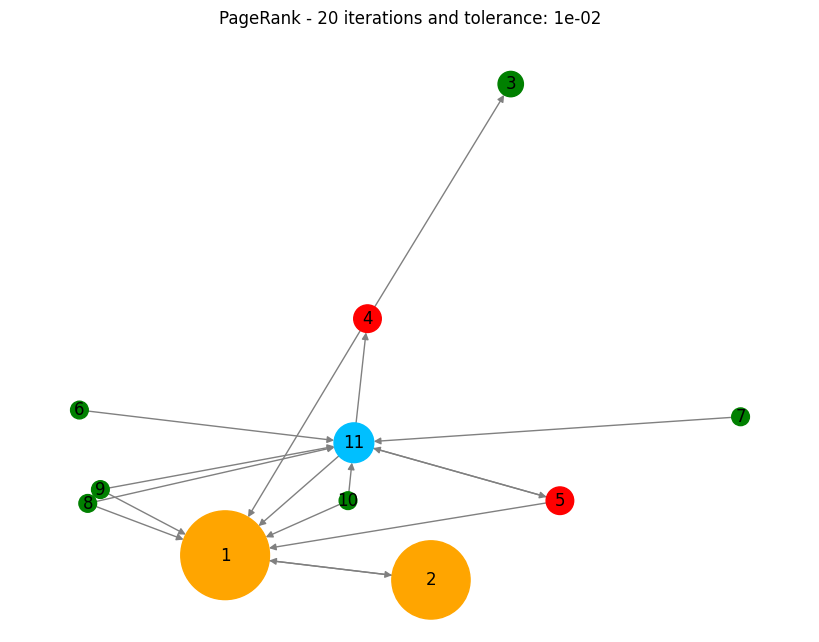

In [130]:
######################################## 9.1.2 ##############################################

def pagerank_20_iterations(G):
    """
    Uses the same algorithm as function plot_smileygraph(G, alpha = 0.85), but allowing only 20 iterations.
    
    Args:
        G: a networkx graph

    Returns:
        Same plot as plot_smileygraph(G, alpha = 0.85).
    """
    # Had to change the tolerance to 1e-2 in order for the power iteration to converge within 20 iterations.
    pr = nx.pagerank(G, alpha= 0.85, personalization=None, max_iter=20, tol=1e-02, nstart=None, weight='weight', dangling=None)
    
    
    pagerank_list = list(pr.values())
    percentile_90 = np.percentile(pagerank_list, 90)
    percentile_75 = np.percentile(pagerank_list, 75)
    percentile_65 = np.percentile(pagerank_list, 65)

    node_colors = []
    for node, pr_value in pr.items():
        if pr_value >= percentile_90:
            node_colors.append('orange')
        elif pr_value >= percentile_75:
            node_colors.append('deepskyblue')
        elif pr_value >= percentile_65:
            node_colors.append('red')
        else:
            node_colors.append('green')
    
    node_sizes = [v * 10000 for v in pr.values()]

    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        with_labels=True,
        node_size = node_sizes,
        node_color = node_colors,
        edge_color='gray',
        font_color='black'
    )
    plt.title("PageRank - 20 iterations and tolerance: 1e-02")
    plt.show()

pagerank_20_iterations(G)

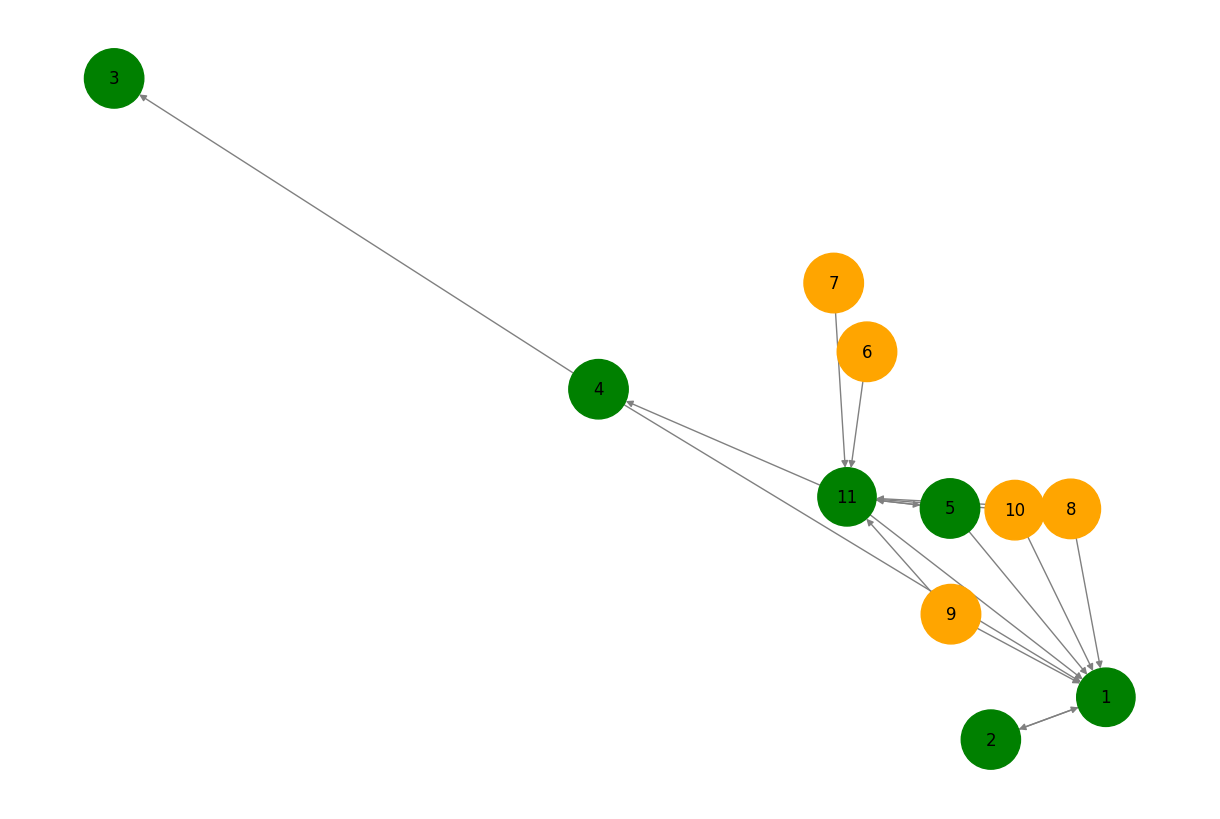

In [131]:
######################################## 9.1.3 ##############################################
def pagerank_with_alpha_negative(G):
  """
  Explores the case of a negative small alpha.
  
  Args:
    G: a networkx graph

  Returns:
    function plot_smileygraph(G, alpha), but with an alpha of -0.01.
  """
  plot_smileygraph(G, -0.01)

pagerank_with_alpha_negative(G)

0.8500000000000001


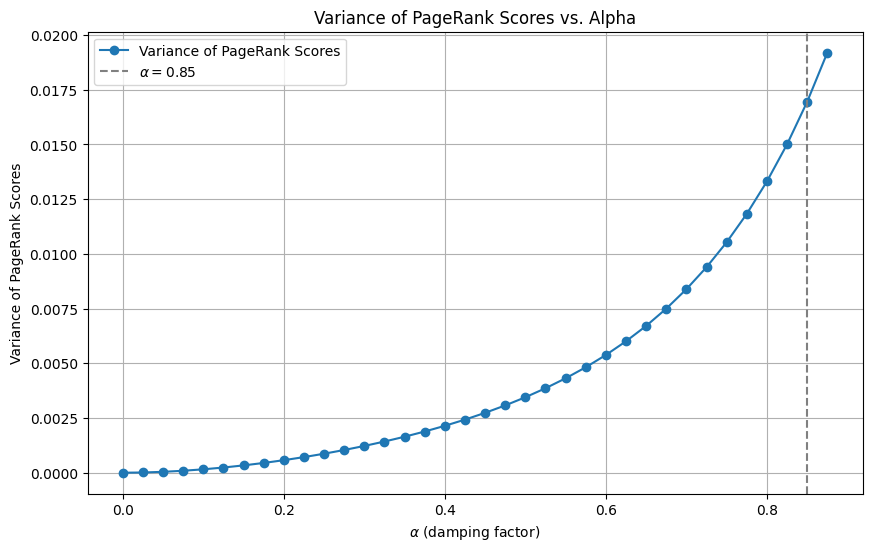

In [ ]:
######################################## 9.1.4 ##############################################
def find_alpha_range(G):
    """
    Explores the range of alphas (from 0.0 to 1.0 with a step size of 0.025) that can be used by the Pagerank algorithm.

    Args:
        G: a networkx graph
    
    Returns:
        min_alpha = minimum meaningful value of alpha
        max_alpha = maximum meaningful value of alpha
        meaningful_alphas = all the alphas that make the algorithm converge
        variance_values = variance of the pagerank scores for each value of alpha
    """
    alpha_values = np.arange(0.0, 1.0, 0.025)
    meaningful_alphas = []
    variance_values = []

    for alpha in alpha_values:
        try:
            pr = nx.pagerank(G, alpha=alpha, max_iter=100, tol=1e-06)
            variance = np.var(list(pr.values()))
            variance_values.append(variance)
            meaningful_alphas.append(alpha)
        except nx.PowerIterationFailedConvergence:
            break # Stop when convergence fails
    
    q1 = np.percentile(variance_values, 25)
    q3 = np.percentile(variance_values, 99)

    meaningful_indices = [i for i, v in enumerate(variance_values) if v <= q3 and v >= q1]
    min_alpha = meaningful_alphas[meaningful_indices[0]] if meaningful_indices else None
    max_alpha = meaningful_alphas[meaningful_indices[-1]] if meaningful_indices else None

    return min_alpha, max_alpha, meaningful_alphas, variance_values


def find_largest_alpha(G):
    """
    Makes it easier to obtain the maximum value of alpha possible.

    Args:
        G: a networkx graph
    
    Returns:
        the maxmimum value of alpha that makes the pagerank algorithm converge.
    """
    max_alpha = find_alpha_range(G)[1]
    return max_alpha


def plot_range(G):
    """
    Plots the range of alphas against the variance of the Pagerank scores for a graph G.

    Args:
        G: a networkx graph
    
    Returns:
        a plot
    """
    meaningful_alphas, variance_values = find_alpha_range(G)[2], find_alpha_range(G)[3]

    plt.figure(figsize=(10, 6))
    plt.plot(meaningful_alphas, variance_values, marker='o', label='Variance of PageRank Scores')
    plt.axvline(x=0.85, color='gray', linestyle='--', label=r'$\alpha=0.85$')
    plt.xlabel(r'$\alpha$ (damping factor)')
    plt.ylabel('Variance of PageRank Scores')
    plt.title('Variance of PageRank Scores vs. Alpha')
    plt.legend()
    plt.grid()
    plt.show()


print(find_largest_alpha(G))
plot_range(G)


### Homework 9.2

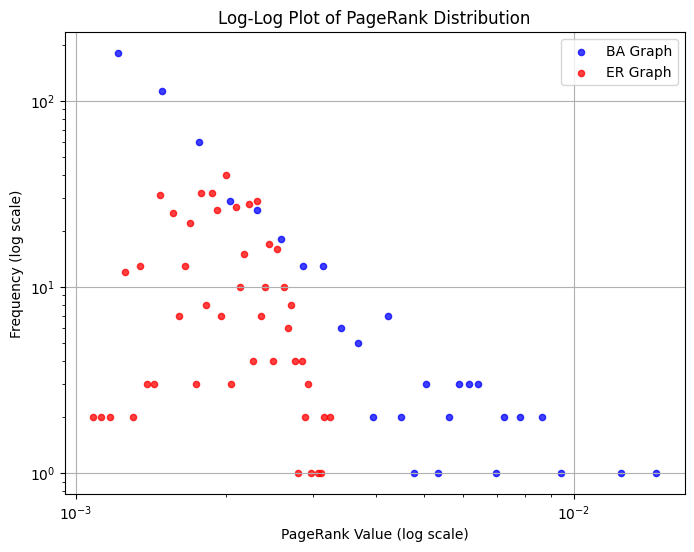

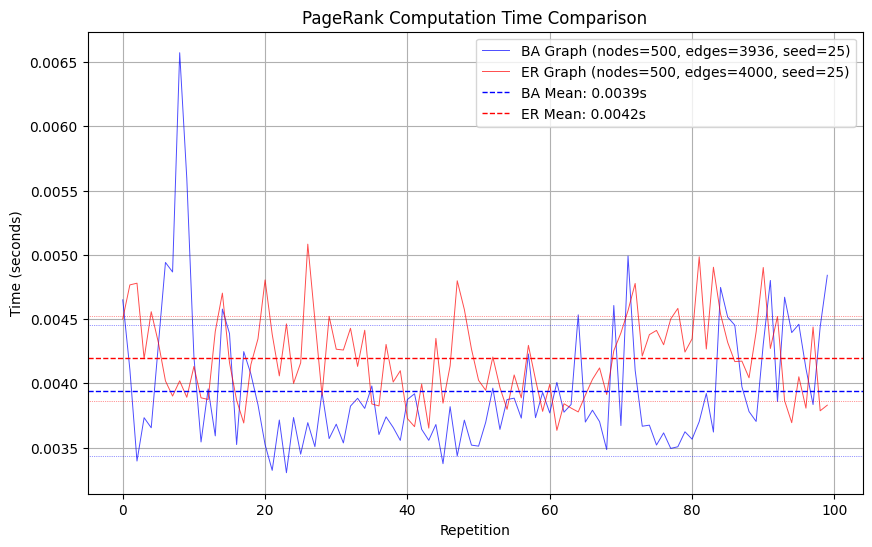

In [149]:
def compare_pagerank_on_BA_GNM(s, nodes_BA = 500, nodes_ER = 500, edges_BA = 4000, edges_ER = 4000):
    """
    Compares pagerank scores of two graphs: a BA network and a ER network, both with 500 nodes and around 4000 edges.

    Args:
        s: the seed used to generate both graphs
        nodes_BA: number of nodes in the BA network. Default = 500
        nodes_ER: number of nodes in the ER network. Default = 500
        edges_BA: an approximation of the number of edges in the BA network. Default = around 4000
        edges_RA: number of edges in the ER network. Default = 4000

    
    Returns:
        A plot of the pagerank distribution of the two networks on a log-log scale, and the plot of the running time of pagerank algorithm on both graphs for 100 repetitions.
    """
    random.seed(s)
    np.random.seed(s) 

    ba = nx.barabasi_albert_graph(nodes_BA, int(edges_BA/nodes_BA), seed = s)
    while ba.number_of_edges() > edges_BA:
        ba.remove_edge(*random.choice(list(ba.edges())))

    er = nx.gnm_random_graph(nodes_ER, edges_ER, seed=s)

    ba_pr = nx.pagerank(ba)   # This returns a dictionary. {node : PageRank value}
    er_pr = nx.pagerank(er)
    
    bapr_list = list(ba_pr.values())
    erpr_list = list(er_pr.values())
    
    # Plot the distribution on a log-log scale
    plt.figure(figsize=(8, 6))
    
    ########  Version 1: Aggregated data points #######
    # Create a histogram of PageRank values
    bacounts, babins = np.histogram(bapr_list, bins=50)  # Adjust bins as needed
    ercounts, erbins = np.histogram(erpr_list, bins=50)
    babin_centers = 0.5 * (babins[:-1] + babins[1:])
    erbin_centers = 0.5 * (erbins[:-1] + erbins[1:])
    
    # Plot the histogram with log-log scaling
    plt.scatter(babin_centers, bacounts, s=20, color='blue', alpha=0.75, label = "BA Graph")
    plt.scatter(erbin_centers, ercounts, s=20, color='red', alpha=0.75, label = "ER Graph")


    ######### Version 2: all data points ##############
    # plt.scatter(bapr_list, range(max(len(bapr_list), len(erpr_list))), color = 'blue', alpha = 0.75, label = "BA Graph")
    # plt.scatter(erpr_list, range(max(len(bapr_list), len(erpr_list))), color = 'red', alpha = 0.75, label = "ER Graph")
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('PageRank Value (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Log-Log Plot of PageRank Distribution')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

    random.seed(s)
    np.random.seed(s) 
    
    # Measure the execution time for 100 repetitions
    ba_time = [
        timeit.timeit(lambda: nx.pagerank(ba), number=1) for _ in range(100)
    ]
    er_time = [
        timeit.timeit(lambda: nx.pagerank(er), number=1) for _ in range(100)
    ]
    

    # Mean and standard deviation
    ba_mean, ba_std = np.mean(ba_time), np.std(ba_time)
    er_mean, er_std = np.mean(er_time), np.std(er_time)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(ba_time, linewidth = 0.7, label=f'BA Graph (nodes={ba.number_of_nodes()}, edges={ba.number_of_edges()}, seed={s})', color='blue', alpha=0.7)
    plt.plot(er_time, linewidth = 0.7, label=f'ER Graph (nodes={er.number_of_nodes()}, edges={er.number_of_edges()}, seed={s})', color='red', alpha=0.7)
    
    # Mean
    plt.axhline(ba_mean, color='blue', linestyle='--', linewidth=1, label=f'BA Mean: {ba_mean:.4f}s')
    plt.axhline(er_mean, color='red', linestyle='--', linewidth=1, label=f'ER Mean: {er_mean:.4f}s')

    # Standard deviation
    plt.axhline(ba_mean + ba_std, color='blue', linestyle=':', linewidth=0.5, alpha = 0.8)
    plt.axhline(ba_mean - ba_std, color='blue', linestyle=':', linewidth=0.5, alpha = 0.8)
    plt.axhline(er_mean + er_std, color='red', linestyle=':', linewidth=0.5, alpha = 0.8)
    plt.axhline(er_mean - er_std, color='red', linestyle=':', linewidth=0.5, alpha = 0.8)

    
    plt.xlabel('Repetition')
    plt.ylabel('Time (seconds)')
    plt.title('PageRank Computation Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()



compare_pagerank_on_BA_GNM(25)